![u](img.png)

##### 샘플 데이터

In [1]:
import pandas as pd
# numpy : 숫자 수치 나타내거나 계산
# import numpy as np

In [2]:
df=pd.read_csv("한글크롤링.csv")
df.head()

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0


# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [3]:
import re
from tqdm import tqdm

In [4]:
# r : 특수기호를 문자로 인식[\\s] -> [\s]
# s = 공백 / ^ = not

In [5]:
# 알파벳, 숫자, 공백, 한글 문자를 제외한 나머지를 제거
# 리뷰가 길어지는 경우 문장 구분을 위해 .?! 보존
pattern = r'[^a-zA-Z0-9가-힣\s\.\?\!]'

In [6]:
new_review = [] # 클렌징한 리뷰가 담길 리스트

for r in tqdm(df.Review):
  text = re.sub(pattern,"",r)
  new_review.append(text)

df['Review_clean'] = new_review

100%|██████████| 6280/6280 [00:00<00:00, 646021.37it/s]


In [7]:
df.head()

,Date,Name,Score,Review,like,Review_clean
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...


### 1.2. 의미없는 짧은 글 제거

In [8]:
# enumerate : 데이터와 데이터 위치값(인덱스값)도 함께 꺼내준다.

In [9]:
# 길이가 10글자 미만이면 삭제
for i, review in enumerate(tqdm(df.Review_clean)):
  if len(review) < 10:
    df = df.drop(i)

100%|██████████| 6280/6280 [00:00<00:00, 7633.39it/s] 


In [10]:
df

,Date,Name,Score,Review,like,Review_clean
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...
...,...,...,...,...,...,...
6233,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,센서를 너무 잘 쓰고 있어요
6234,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,짱!! 밖에 나가도 되니까 진짜 좋아요!
6235,2018년 3월 1일,헤이헤이,5,센서 사용이 신기해요,0,센서 사용이 신기해요
6242,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!!^^이 앱 만드신 제작자님!힘네세요!!!,0,제가 이거 다운받았는데 돼요!!!이 앱 만드신 제작자님!힘네세요!!!


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [11]:
# konlpy : 한국어 형태소 분석
# Okt : 트위터 오픈소스 한국어 처리

In [12]:
!pip install konlpy

In [13]:
from konlpy.tag import Okt
okt=Okt()

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [14]:
#불용어 가져오기 + 리스트화
stopwords_df = pd.read_csv('ko-stopwords.csv')
stopwords_df

,stopwords
0,가
1,가까스로
2,가령
3,각
4,각각
...,...
594,힘입어
595,하다
596,이다
597,되다


In [15]:
stopwords = list(stopwords_df['stopwords'])
stopwords

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [16]:
#원하는 태그 추출 & 불용어 제거

def okt_pos_tagging(string): # 사용자 정의 함수, 매개변수 = String
    pos_words = okt.pos(string, stem=True, norm=True) # pos 함수 : 형태소를 쪼개면서 동시에 품사를 알려준다.

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords: # 불용어 목록에 들어있지 않으면
                tagged_list.append(word) # 리스트 목록에 추가해라
    if len(tagged_list) == 0 :
      tagged_list.append("None")
    return tagged_list

In [17]:
# test
okt_pos_tagging(df.Review_clean[0])

['시스템',
 '에어컨',
 '대다',
 '연결하다',
 '격',
 '제어',
 '사용',
 '에어컨',
 '기능',
 '공기청정기',
 '능',
 '앱',
 '모드',
 '청정',
 '모드',
 '없다',
 '냉방',
 '습',
 '송풍',
 '난방',
 '자동',
 '만',
 '청정',
 '없다',
 '리모컨',
 '청정',
 '누르다',
 '앱',
 '송풍',
 '데',
 '앱',
 '송풍',
 '선택',
 '청정',
 '않다',
 '리모컨',
 '송풍',
 '청정',
 '킬수',
 '원격',
 '송풍',
 '청정',
 '에어컨',
 '공기',
 '청정',
 '난방',
 '청정',
 '사용']

### 2.2 데이터 프레임에 추가

In [18]:
#형태소 분리 및 df 적용
tagged_review = []
for review in tqdm(df.Review):
    tagged = okt_pos_tagging(review)
    tagged_review.append(tagged)

100%|██████████| 4061/4061 [00:14<00:00, 274.01it/s]


In [19]:
df['tagged_review'] = tagged_review
df.head(100)

,Date,Name,Score,Review,like,Review_clean,tagged_review
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ..."
...,...,...,...,...,...,...,...
95,2020년 1월 8일,이지영,2,앱ㅓ업데이트되면서 사용하던 청소기가 화면에서 보이지 않고 세부 설정을 들어가서 확인...,0,앱업데이트되면서 사용하던 청소기가 화면에서 보이지 않고 세부 설정을 들어가서 확인해...,"[앱, 업데이트, 사용, 청소기, 화면, 보이지, 않다, 세부, 설정, 들어가다, ..."
96,2020년 1월 19일,손경화,5,기계와기계를 소통하게 해주는 의사소통이 신기하군요. 고맙습니다.,0,기계와기계를 소통하게 해주는 의사소통이 신기하군요. 고맙습니다.,"[기계, 기계, 소통, 해주다, 의사소통, 신기하다, 고맙다]"
97,2019년 12월 11일,조용찬,1,알림은 잘 오는데 앱을 켰을 때는 서버가 응답을 않는다고 자동 종료... 3개월째....,2,알림은 잘 오는데 앱을 켰을 때는 서버가 응답을 않는다고 자동 종료... 3개월째....,"[알림, 자다, 오다, 앱, 켜다, 서버, 응답, 않다, 자동, 종료, 개월, 응답..."
98,2019년 12월 13일,박창민,1,겔 8. 쓰는데 앱 로딩시 계속 팅기네요. 이건 예전부터 적엇는데 전혀 패치시 적용...,2,겔 8. 쓰는데 앱 로딩시 계속 팅기네요. 이건 예전부터 적엇는데 전혀 패치시 적용...,"[겔, 쓰다, 앱, 로딩, 시, 계속, 팅기다, 예전, 적, 늘다, 전혀, 패치, ..."


# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

In [20]:
#import gensim 안될때 첫번째시도
# pip install --upgrade scipy
# pip install --upgrade gensim

#두번째시도
#pip install --upgrade numpy

In [21]:
!pip install scipy

In [22]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

### 3.1 doc2vec 준비
    - word2vec은 단어 하나를 하나의 vector화
    - doc2vec은 문서 하나를 하나의 vector화

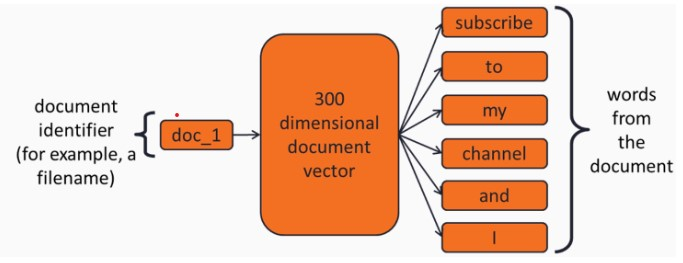

In [23]:
#  doc2vec의 행위
# 1. 몇개의 단어세트가 문서의 의미를 녹이는데 도움이 될 것 인가?
# 2. 다음 단어는 무엇이 나올지 학습 -> 단어 맞추기 시킴

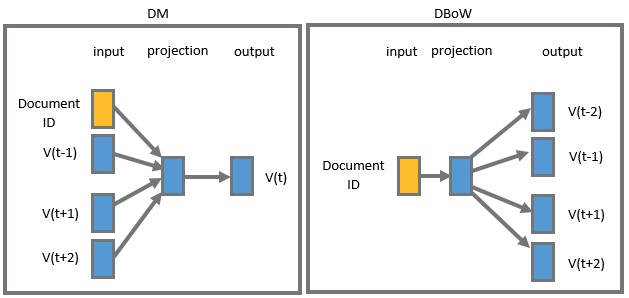

In [24]:
# doc2vac은 학습을 시킬 때 문서의 고유한 ID값을 같이 넣게 되어있다.

In [25]:
# 문서마다 고유한 document 번호 부여
# doc2vec
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 4061


In [26]:
tagged_corpus_list[0]

TaggedDocument(words=['시스템', '에어컨', '대다', '연결하다', '격', '제어', '사용', '에어컨', '기능', '공기청정기', '능', '앱', '모드', '청정', '모드', '없다', '냉방', '습', '송풍', '난방', '자동', '만', '청정', '없다', '리모컨', '청정', '누르다', '앱', '송풍', '데', '앱', '송풍', '선택', '청정', '않다', '리모컨', '송풍', '청정', '킬수', '원격', '송풍', '공기', '청정', '에어컨', '공기', '청정', '난방', '청정', '사용'], tags=['document 0'])

### 3.2 doc2vec 학습시키기
    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [27]:
# doc2vec모델 : 아무것도 배우지 않은 모델
# vector_size=a : 문서를 숫자로 바꾸었을 때 a개로 뽑기 (기본 크기 = 50,100,200,300)
# 숫자의 의미를 알 수는 없다. -> 그냥 믿고 쓰는 것!
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)

# Vocabulary 빌드 : 단어사전 구축
model.build_vocab(tagged_corpus_list)

# Doc2Vec 학습 : 문서를 숫자로 만들기 위한 학습
#epochs가 너무 많이 돌아가면 과적합의 가능성 / 학습속도 느려짐 (epochs=5 / 총 5번 정도 학습해라)
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

In [28]:
# 대형 언어모델을 활용해서 enbedding을 연구하고 있다.
# But 너무 광범위 하기 때문에 인사이트를 얻기 어렵다.

In [29]:
model.dv['document 0']

array([-0.02588208, -0.00854907, -0.00861599, -0.01953627,  0.02009119,
       -0.07499222,  0.00511098,  0.05818273, -0.01437455, -0.0176849 ,
       -0.0450553 , -0.05012287, -0.0201024 , -0.01077226,  0.00818822,
       -0.03384194,  0.02259927, -0.04116542, -0.00740429, -0.07646134,
        0.02740445,  0.02481266,  0.03360528, -0.00311591,  0.00975977,
        0.00768411, -0.02849278, -0.07974888, -0.03868263, -0.01542491,
        0.03989048,  0.02554326,  0.01358385, -0.03281668, -0.02495972,
        0.05272548, -0.06016876, -0.04455191, -0.04027506, -0.07477862,
       -0.05008788, -0.03564894,  0.00464963, -0.00859684,  0.07250945,
       -0.05474475, -0.00799656, -0.0299265 ,  0.03770952,  0.00709211,
        0.01036899, -0.03961872,  0.00302389, -0.00338975, -0.05161582,
        0.04260079,  0.00272341, -0.03203419, -0.05623034,  0.03119535,
       -0.00258744,  0.01554428, -0.01693122, -0.00084523, -0.03019992,
        0.04437706,  0.0157761 ,  0.04767723, -0.06847007,  0.06

### 3.3 벡터 값 데이터 프레임에 추가

In [30]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)

100%|██████████| 4061/4061 [00:00<00:00, 800576.64it/s]


In [31]:
df['vector'] = vector_list

In [32]:
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review,vector
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.02588208, -0.008549074, -0.008615992, -0.0..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-0.028808242, -0.02936835, -0.024815394, -0.0..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.01910409, 0.0023352471, 0.019447336, -0.00..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.010919327, 0.0038621244, 0.00045724883, -0..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.029613342, -0.031387687, -0.018810509, -0...."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

In [34]:
# 좋은 군집 데이터 : 비슷한 데이터는 모이고, 각각의 개별 군집은 멀리 떨어져 있는 것
# 몇개의 군집이 좋은지 알 수 있는 score 기법 : 실루엣 계수
# 1에 가까울수록 괜찮은 군집이다.

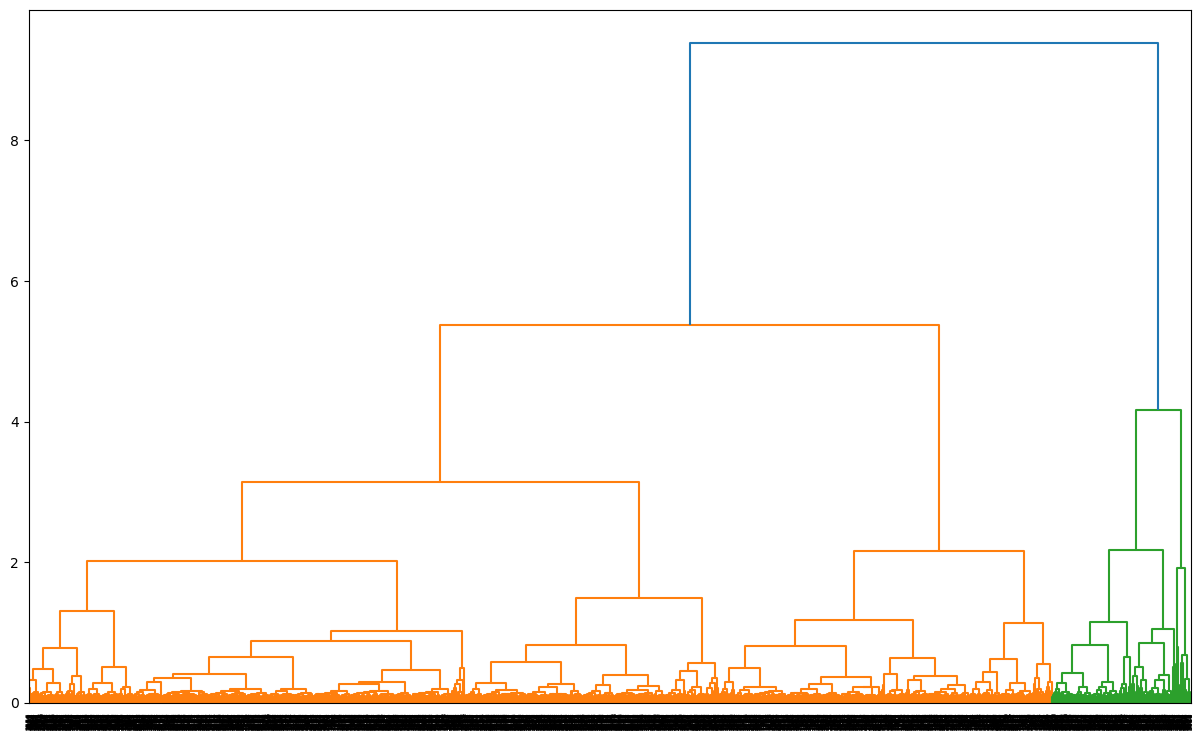

In [35]:
linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9)) #인치
dendrogram(linked,
            orientation='top',# 위에서부터 아래로
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [36]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [37]:
# fit_predict : 학습과 예측을 한번에 할 수 있음
# 실루엣계수 유용한 수치 : 0.5 이상

In [38]:
#2개로만 뽑아보기

cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)

In [39]:
silhouette_avg

0.52116096

### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [40]:
# 엘보우 기법 : 군집의 숫자를 결정하는 것에 있어서 급격하게 변화하는 그래프를 통해서 확인하는 방식

In [41]:
n_clutser=[]
clustering_score = []
for i in tqdm(range(2, 30)): # 군집을 2개부터 29개까지 만들것이다.
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

100%|██████████| 28/28 [00:20<00:00,  1.34it/s]


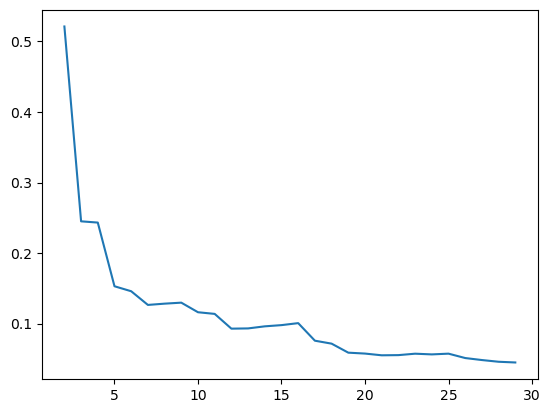

In [42]:
# 시각화 코드
plt.plot(n_clutser, clustering_score)

In [43]:
# 그래프 데이터프레임
result = pd.DataFrame({'n_cluster':n_clutser, 'score':clustering_score})
result

,n_cluster,score
0,2,0.521161
1,3,0.244972
2,4,0.243204
3,5,0.152941
4,6,0.145868
5,7,0.126484
6,8,0.128280
7,9,0.129693
8,10,0.116105
9,11,0.113761


In [44]:
cluster = AgglomerativeClustering(n_clusters=6,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.02588208, -0.008549074, -0.008615992, -0.0...",2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-0.028808242, -0.02936835, -0.024815394, -0.0...",1
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[-0.01910409, 0.0023352471, 0.019447336, -0.00...",2
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.010919327, 0.0038621244, 0.00045724883, -0...",1
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[-0.029613342, -0.031387687, -0.018810509, -0....",1


# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [45]:
# 한문서(한문장)에서는 자주 등장하지만, 전체문서(전체문장)에서는 자주 등장하지 않는 단어가 의미있는 단어

In [46]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
#각 클러스터들을 하나의 문서로 가정
all_document=[]
for i in df['cluster'].unique(): # 0~5군집까지

    #각 클러스터들을 하나의 문서로 가정
    #데이터 프레임에서 추출하여 tagged_Review를 join을 이용하여 합치기
    pos_tagged = df[df['cluster']==i].tagged_review # boolen indexing : 해당 군집에 있는 데이터만 추출

    #포스태깅된 데이터들을 공백 기준으로 하나로 합쳐 하나의 document로 생성
    cluster_document=''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)

In [48]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)

In [49]:
# 각 단어와 TF-IDF 값을 확인
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
tf_idf_df

,가게,가격,가구,가기,가까워지다,가까이,가깝다,가끔,가끔설정,가끔완료,...,희망,흰색,히스토리,히키,힘내다최근,힘드다,힘드다요즘,힘들다,힘들다서버,힘쓰다
0,0.000000,0.011293,0.000000,0.000000,0.00000,0.000000,0.013178,0.000000,0.000000,0.000000,...,0.000000,0.006345,0.000000,0.000000,0.006345,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.001416,0.002387,0.001653,0.00000,0.000000,0.000000,0.007337,0.002387,0.002387,...,0.001653,0.000000,0.000000,0.002387,0.000000,0.003669,0.002387,0.002446,0.00000,0.000000
2,0.002311,0.000000,0.000000,0.003902,0.00000,0.000000,0.000000,0.007219,0.000000,0.000000,...,0.001951,0.000000,0.002818,0.000000,0.000000,0.001444,0.000000,0.005775,0.00000,0.000000
3,0.004035,0.008757,0.000000,0.000000,0.00000,0.004035,0.000000,0.017645,0.000000,0.000000,...,0.003406,0.000000,0.000000,0.000000,0.000000,0.005041,0.000000,0.002521,0.00492,0.000000
4,0.000000,0.005624,0.000000,0.006563,0.00948,0.007774,0.006563,0.009714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004857,0.000000,0.004857,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.021099,0.007807,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007807,0.000000,0.046842,0.00000,0.015238


### 5.2 데이터프레임으로 만들고 정렬하기

In [50]:
#행과 열 변환
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed

,0,1,2,3,4,5
가게,0.000000,0.000000,0.002311,0.004035,0.000000,0.000000
가격,0.011293,0.001416,0.000000,0.008757,0.005624,0.000000
가구,0.000000,0.002387,0.000000,0.000000,0.000000,0.000000
가기,0.000000,0.001653,0.003902,0.000000,0.006563,0.000000
가까워지다,0.000000,0.000000,0.000000,0.000000,0.009480,0.000000
...,...,...,...,...,...,...
힘드다,0.000000,0.003669,0.001444,0.005041,0.004857,0.007807
힘드다요즘,0.000000,0.002387,0.000000,0.000000,0.000000,0.000000
힘들다,0.000000,0.002446,0.005775,0.002521,0.004857,0.046842
힘들다서버,0.000000,0.000000,0.000000,0.004920,0.000000,0.000000


In [51]:
for i in tqdm(tf_idf_df_transposed.columns):

    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word':tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    data_df.to_csv('Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')

100%|██████████| 6/6 [00:00<00:00, 62.96it/s]
